Name-Vipul Anand
Assignment-Loan Application Status Prediction
Batch-DS2312

Problem Statement-This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Task-To build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.`

So let us get started

In [558]:
#Importing the libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
#We have ignore the warnings here also as they can create unecessary disturtance while working on the project

In [559]:
#The dataset
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')

In [560]:
data.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


#The column name seems to be distorted. So before doing anything let us first give suitable names to these columns from the names which were provided in the documents

In [561]:
data.columns=['Loan_id', 'Gender', 'Married', 'Dependents', 'Education', 'Self_employed', 'Applicant income', 'coAapplicant_income','loan_amount', 'loan_amount_term', 'credit_history', 'Property_area', 'Loan_status']

In [562]:
data.head()

,Loan_id,Gender,Married,Dependents,Education,Self_employed,Applicant income,coAapplicant_income,loan_amount,loan_amount_term,credit_history,Property_area,Loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
#SO we have succesfully named the columns with proper format

In [ ]:
#let us now analyse the columns and see which feature has what kind of relation with the label

In [563]:
data.isna().sum()

Loan_id                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_employed          32
Applicant income        0
coAapplicant_income     0
loan_amount            21
loan_amount_term       14
credit_history         50
Property_area           0
Loan_status             0
dtype: int64

In [83]:
#The data has nulls so before visualizing we should first treat the nulls based on that we can visualize better
data.dtypes

Loan_id                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_employed           object
Applicant income         int64
coAapplicant_income    float64
loan_amount            float64
loan_amount_term       float64
credit_history         float64
Property_area           object
Loan_status             object
dtype: object

In [84]:
data.shape

(613, 13)

In [564]:
#Let us divide the columns into continous and categorical
continuous_columns=[]
categorical_columns=[]
for i in data:
    if data[i].dtype=='object':
        categorical_columns.append(i)
    else:
        continuous_columns.append(i)
print(continuous_columns)
print(categorical_columns)

['Applicant income', 'coAapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history']
['Loan_id', 'Gender', 'Married', 'Dependents', 'Education', 'Self_employed', 'Property_area', 'Loan_status']


We will use the simple imputer to imputer the categorical columns and will use the knn imputer to use the continous ones
We know that knn imputer is specially meant for the continous ones

In [565]:
from sklearn.impute import SimpleImputer, KNNImputer
si=SimpleImputer(strategy='most_frequent') #For categorical columns we will use the mode which means most occouring element
knn=KNNImputer(n_neighbors=8) #For the continous we will use the knn with neighbours=8 which means mean of 8 will be used

In [566]:
data[categorical_columns]=si.fit_transform(data[categorical_columns])

In [567]:
data[continuous_columns]=knn.fit_transform(data[continuous_columns])

Now we have succesfully removed all the nulls

In [568]:
data.isna().sum()

Loan_id                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_employed          0
Applicant income       0
coAapplicant_income    0
loan_amount            0
loan_amount_term       0
credit_history         0
Property_area          0
Loan_status            0
dtype: int64

In [569]:
#Now let us see the other process
data['Loan_id'].value_counts()

Loan_id
LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: count, Length: 613, dtype: int64

#This loan id columns with each  value different in each row is not useful at all. It is not continous nor categorical
It is better to remove this

In [570]:
data=data.drop(columns='Loan_id')

In [571]:
data.head()

,Gender,Married,Dependents,Education,Self_employed,Applicant income,coAapplicant_income,loan_amount,loan_amount_term,credit_history,Property_area,Loan_status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y


<Axes: xlabel='Gender', ylabel='count'>

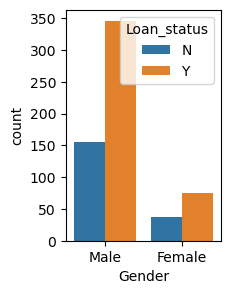

In [93]:
#Now let us visualize the columns
plt.figure(figsize=(2,3))
sns.countplot(x=data['Gender'],hue=data['Loan_status'])

In [ ]:
#The applicants are more male and the ratio of getting the loan is similar in both of them

<Axes: xlabel='Dependents', ylabel='count'>

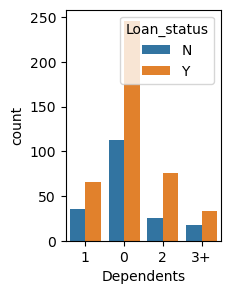

In [94]:
plt.figure(figsize=(2,3))
sns.countplot(x=data['Dependents'],hue=data['Loan_status'])

The applicants with 0 dependents have got the loan most number of times.As this is obvous that bank might be thinking that the 
applicants with have to dependencies on them have less responsibilities and hence the chances of them paying the loan back is more as compared to the applicants with more dependencies on them.

<Axes: xlabel='Education', ylabel='count'>

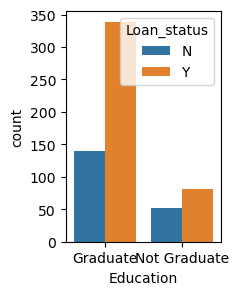

In [95]:
plt.figure(figsize=(2,3))
sns.countplot(x=data['Education'],hue=data['Loan_status'])

The people who have got the loan are most graduate as seen from this graph

<Axes: xlabel='Self_employed', ylabel='count'>

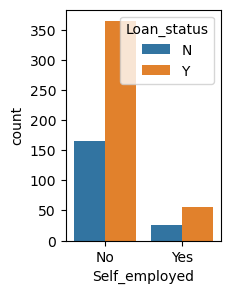

In [96]:
plt.figure(figsize=(2,3))
sns.countplot(x=data['Self_employed'],hue=data['Loan_status'])

The applicants who have got the loan are not self_employed

<Axes: xlabel='Applicant income', ylabel='Density'>

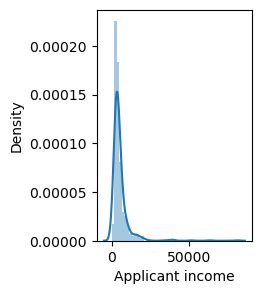

In [49]:
plt.figure(figsize=(2,3))
sns.distplot(data['Applicant income'])

<Axes: xlabel='Loan_status', ylabel='Applicant income'>

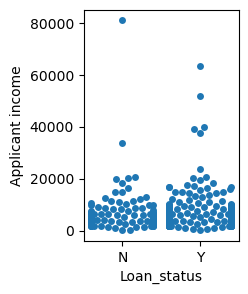

In [51]:
plt.figure(figsize=(2,3))
sns.swarmplot(x=data['Loan_status'],y=data['Applicant income'])
plt.show()

Here from the graph there is not much relationship between  the loan status and the income. But still it seems that the applicants with more income have more chances of getting the loan

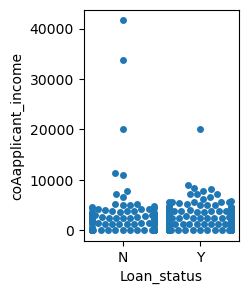

In [56]:
plt.figure(figsize=(2,3))
sns.swarmplot(x=data['Loan_status'],y=data['coAapplicant_income'])
plt.show()

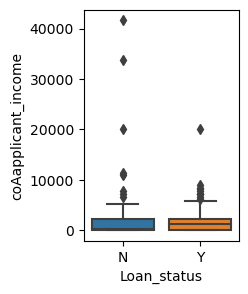

In [57]:
plt.figure(figsize=(2,3))
sns.boxplot(x=data['Loan_status'],y=data['coAapplicant_income'])
plt.show()

Here also the relation does not seems to be very high

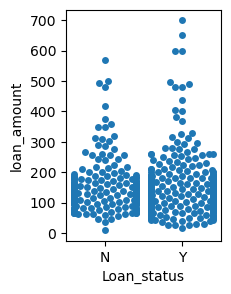

In [62]:
plt.figure(figsize=(2,3))
sns.swarmplot(x=data['Loan_status'],y=data['loan_amount'])
plt.show()

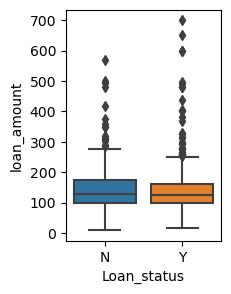

In [63]:
plt.figure(figsize=(2,3))
sns.boxplot(x=data['Loan_status'],y=data['loan_amount'])
plt.show()

Loan with higher amount have a higher chances of getting sanctioned from the bank as per this graph

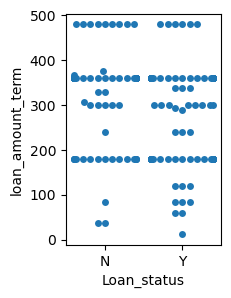

In [64]:
plt.figure(figsize=(2,3))
sns.swarmplot(x=data['Loan_status'],y=data['loan_amount_term'])
plt.show()

In [24]:
data['loan_amount_term'].value_counts()

loan_amount_term
360.0    515
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
337.5      3
330.0      2
60.0       2
36.0       2
289.5      1
292.5      1
375.0      1
307.5      1
367.5      1
12.0       1
Name: count, dtype: int64

#The loan amount term is actually a categorical column so let categorize it
It is not feasible to use these many unique values so will combine come value counts to make it simples

In [572]:
def loan_amount(value):
    if value==360.0:
        return value
    else:
        return 'others'

In [573]:
data['loan_amount_term']=data['loan_amount_term'].apply(loan_amount)

In [574]:
data['loan_amount_term'].value_counts()

loan_amount_term
360.0     515
others     98
Name: count, dtype: int64

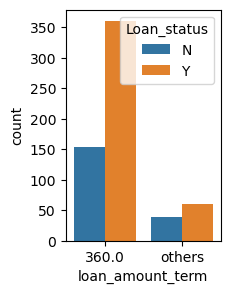

In [575]:
plt.figure(figsize=(2,3))
sns.countplot(x=data['loan_amount_term'],hue=data['Loan_status'])
plt.show()

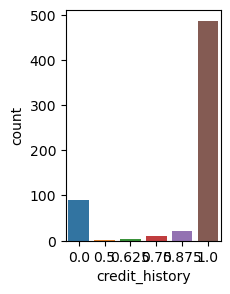

In [72]:
plt.figure(figsize=(2,3))
sns.countplot(x=data['credit_history'])
plt.show()

In [28]:
data['credit_history'].value_counts()

credit_history
1.000    488
0.000     89
0.875     21
0.750     10
0.625      3
0.500      2
Name: count, dtype: int64

There is a lot of imbalance between this colums so let us combine the columns with similar value counts

In [576]:
def credit(value):
    if value==1.000:
        return value
    else:
        return 'other'
data['credit_history']=data['credit_history'].apply(credit)

In [577]:
data['credit_history'].value_counts()

credit_history
1.0      488
other    125
Name: count, dtype: int64

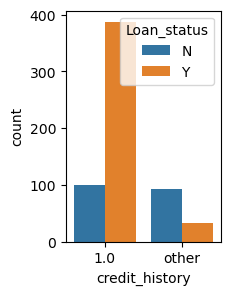

In [103]:
plt.figure(figsize=(2,3))
sns.countplot(x=data['credit_history'],hue=data['Loan_status'])
plt.show()

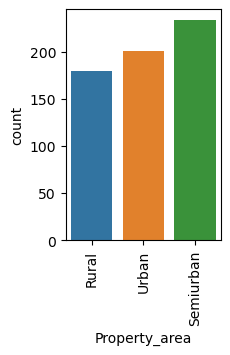

In [80]:
plt.figure(figsize=(2,3))
sns.countplot(x=data['Property_area'])
plt.xticks(rotation=90)
plt.show()

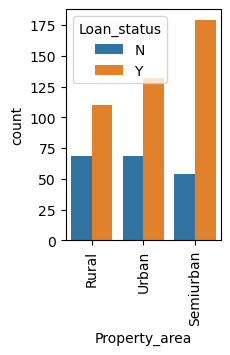

In [81]:
plt.figure(figsize=(2,3))
sns.countplot(x=data['Property_area'],hue=data['Loan_status'])
plt.xticks(rotation=90)
plt.show()

The applicants from the semi urban area are the most and apart from this the semiurban applicants have  a greate chance of 
getting a loan as seen from this graph.

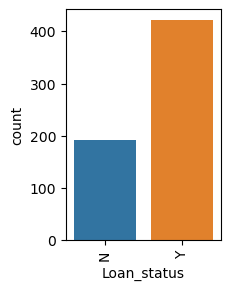

In [82]:
plt.figure(figsize=(2,3))
sns.countplot(x=data['Loan_status'])
plt.xticks(rotation=90)
plt.show()

This is the label of our dataset and there is a slight imbalance in this. we will treat this later on. 
As from this graph the applicants with yes status are more.

In [104]:
data.head()

,Gender,Married,Dependents,Education,Self_employed,Applicant income,coAapplicant_income,loan_amount,loan_amount_term,credit_history,Property_area,Loan_status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y


Now we will encode the categorical columns and after that we will treat the outliers of the  numerical columns

In [578]:
categorical_columns.remove('Loan_id') # We have removed the loan id from the columns itlsef so we have to remove here also

In [579]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_employed',
 'Property_area',
 'Loan_status']

In [580]:
data['loan_amount_term'].value_counts()

loan_amount_term
360.0     515
others     98
Name: count, dtype: int64

In [581]:
data['credit_history'].value_counts()

credit_history
1.0      488
other    125
Name: count, dtype: int64

#So the thing which can clearly visualize here is that the loan amount term and the credit history is also categorical and we need to add these column to the categorical columns

In [582]:
categorical_columns.append('loan_amount_term')

In [583]:
categorical_columns.append('credit_history')

In [584]:
categorical_columns.remove('Loan_status') #We have removed the loan status as we do not want our label to be encoded using the
#ONe hot encoder. we will use the label encoder to encode the label

In [585]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_employed',
 'Property_area',
 'loan_amount_term',
 'credit_history']

In [586]:
len(categorical_columns)

8

In [587]:
data.head()

,Gender,Married,Dependents,Education,Self_employed,Applicant income,coAapplicant_income,loan_amount,loan_amount_term,credit_history,Property_area,Loan_status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y


So now let us encode the categorical column properly
We will be using the various encoders provided by the sklearn library to encode the columns
We will use the labelencoder to encode the label Loan status and for the rest we will use the one hot encoder because sometimes
the label encoder makes a ordinal relationship inbetween the columns which may not be beneficial for the models

In [588]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lab_enc=LabelEncoder()
one=OneHotEncoder(sparse=False)

In [589]:
data['Loan_status']=lab_enc.fit_transform(data['Loan_status'])

In [590]:
for i in categorical_columns:
    dummies=pd.get_dummies(data[[i]])
    dummies=dummies.replace({True:1,False:0})
    data=pd.concat([data,dummies],axis=1)
    data=data.drop(columns=i)
data.head()

,Applicant income,coAapplicant_income,loan_amount,Loan_status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_employed_No,Self_employed_Yes,Property_area_Rural,Property_area_Semiurban,Property_area_Urban,loan_amount_term_360.0,loan_amount_term_others,credit_history_1.0,credit_history_other
0,4583.0,1508.0,128.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0
1,3000.0,0.0,66.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0
2,2583.0,2358.0,120.0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0
3,6000.0,0.0,141.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
4,5417.0,4196.0,267.0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0


In [591]:
pd.set_option('display.max_columns', None)
data

,Applicant income,coAapplicant_income,loan_amount,Loan_status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_employed_No,Self_employed_Yes,Property_area_Rural,Property_area_Semiurban,Property_area_Urban,loan_amount_term_360.0,loan_amount_term_others,credit_history_1.0,credit_history_other
0,4583.0,1508.0,128.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0
1,3000.0,0.0,66.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0
2,2583.0,2358.0,120.0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0
3,6000.0,0.0,141.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
4,5417.0,4196.0,267.0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,2900.0,0.0,71.0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0
609,4106.0,0.0,40.0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0
610,8072.0,240.0,253.0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0
611,7583.0,0.0,187.0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,1,0


In [592]:
data['Loan_status'].value_counts()

Loan_status
1    421
0    192
Name: count, dtype: int64

So we have succesfully done the encoding part now let us visualize the  continous columns and see the outliers present

In [593]:
continuous_columns

['Applicant income',
 'coAapplicant_income',
 'loan_amount',
 'loan_amount_term',
 'credit_history']

In [594]:
continuous_columns.remove('loan_amount_term')

In [595]:
continuous_columns.remove('credit_history')

In [596]:
continuous_columns

['Applicant income', 'coAapplicant_income', 'loan_amount']

We have removed the loan amount term and the credit history as we have categorized them

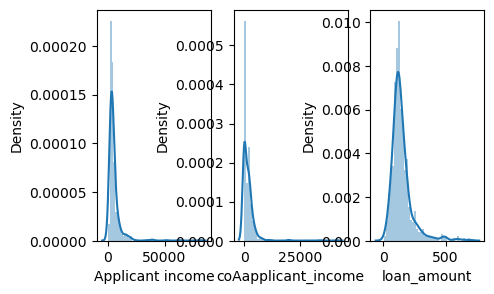

In [597]:
plt.figure(figsize=(5,3))
plotnumber=1
for i in continuous_columns:
    plt.subplot(1,3,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.show()

There seems to be skewness and outliers in the right side So let us draw the box plot and see

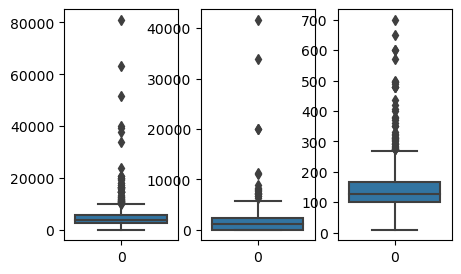

In [598]:
plt.figure(figsize=(5,3))
plotnumber=1
for i in continuous_columns:
    plt.subplot(1,3,plotnumber)
    sns.boxplot(data[i])
    plotnumber+=1
plt.show()

So out visualization was right now let us remove this
We will use the zscore at first to treat the outliers. if the outliers removed by the zscore is in limited feasible amount
than it is good otherwise we will have to use other process for this

In [599]:
from scipy.stats import zscore

In [600]:
Zscore=np.abs(zscore(data[continuous_columns])) # We have used the absolute  zscore here to see what percentage of data
#acutually falls in the standard deviation of 3

In [601]:
index=np.where(Zscore>3)[0]

In [602]:
len(index)

29

In [603]:
np.where(Zscore>3)

(array([  8, 125, 129, 154, 154, 170, 170, 176, 176, 182, 184, 277, 283,
        307, 332, 332, 368, 401, 408, 416, 431, 442, 486, 505, 522, 560,
        580, 599, 603], dtype=int64),
 array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0,
        2, 2, 2, 2, 1, 1, 2], dtype=int64))

In [604]:
Zscore.head()

,Applicant income,coAapplicant_income,loan_amount
0,0.134184,0.039614,0.214350
1,0.393309,0.555079,0.942309
2,0.461569,0.250933,0.308280
3,0.097768,0.555079,0.061714
4,0.002335,0.879199,1.417688


In [ ]:
#So as per the zscore there are only 29 data points which fall above the zscore area of 3 so we cqn remove them

In [605]:
data=data.drop(index=index)

In [606]:
data.reset_index(drop=True,inplace=True)

In [607]:
data

,Applicant income,coAapplicant_income,loan_amount,Loan_status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_employed_No,Self_employed_Yes,Property_area_Rural,Property_area_Semiurban,Property_area_Urban,loan_amount_term_360.0,loan_amount_term_others,credit_history_1.0,credit_history_other
0,4583.0,1508.0,128.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0
1,3000.0,0.0,66.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0
2,2583.0,2358.0,120.0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0
3,6000.0,0.0,141.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
4,5417.0,4196.0,267.0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2900.0,0.0,71.0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0
584,4106.0,0.0,40.0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0
585,8072.0,240.0,253.0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0
586,7583.0,0.0,187.0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,1,0


So after removing the outliers with the help of zscore we only lost 5% of the data which is feasible 
Now let us again see the distribution of the continous columns of this dataset

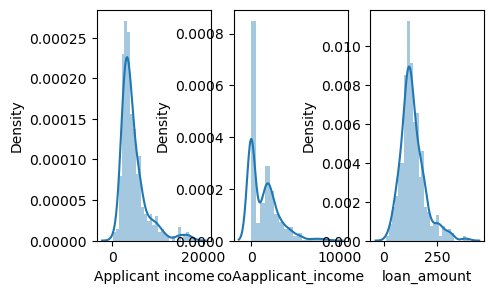

In [145]:
plt.figure(figsize=(5,3))
plotnumber=1
for i in continuous_columns:
    plt.subplot(1,3,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.show()

We can clearly see that there is a considerable change in the distribution of the columns and now these columns are having
the distribution which is close to normal and we can also visualize it cleally

Now let us visualize the relation of the continous columns with the label which is the loan status

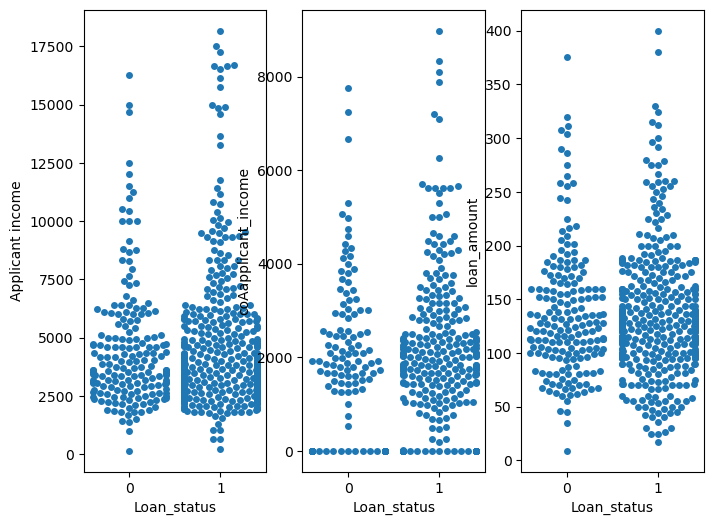

In [153]:
plt.figure(figsize=(8,6))
plotnumber=1
for i in continuous_columns:
    plt.subplot(1,3,plotnumber)
    sns.swarmplot(x=data['Loan_status'],y=data[i])
    plotnumber+=1
plt.show()

#SO there seems a little relation between the columns the applicant with high income and high loan amount have more chances
of getting the loan as compared to the ones who have low income

In [156]:
data.head()

,Applicant income,coAapplicant_income,loan_amount,Loan_status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_employed_No,Self_employed_Yes,Property_area_Rural,Property_area_Semiurban,Property_area_Urban,loan_amount_term_360.0,loan_amount_term_others,credit_history_1.0,credit_history_other
0,4583.0,1508.0,128.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0
1,3000.0,0.0,66.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0
2,2583.0,2358.0,120.0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0
3,6000.0,0.0,141.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
4,5417.0,4196.0,267.0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0


In [157]:
#Now let us see the correlation
corr=data.corr()

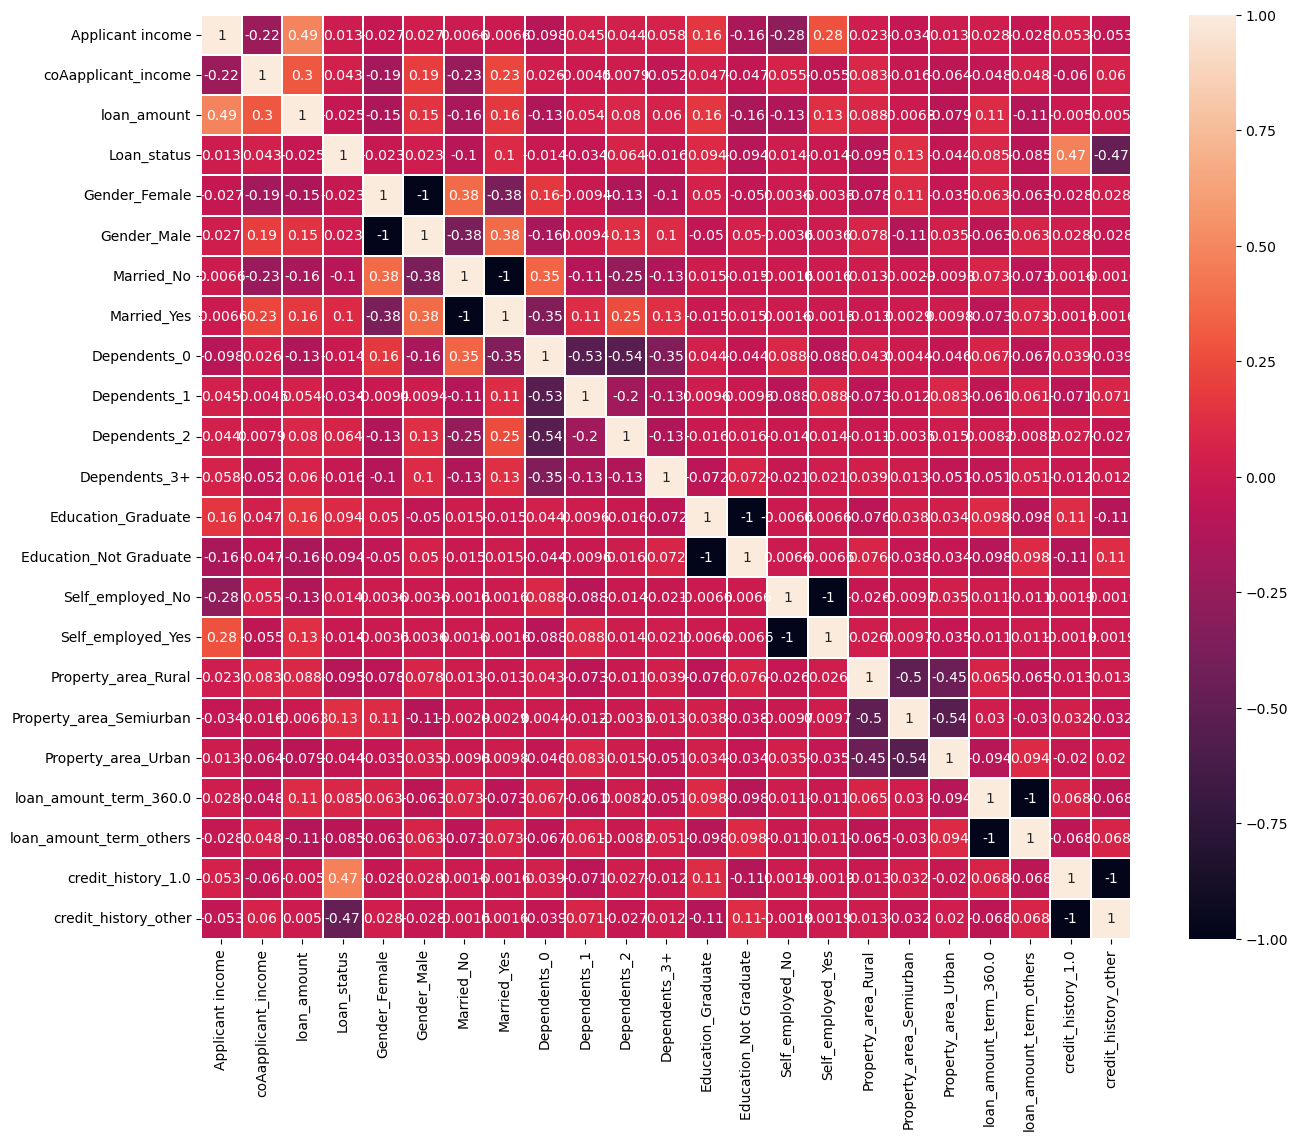

In [159]:
#Visualization of the correlation
plt.figure(figsize=(15,12))
sns.heatmap(corr,linewidths=0.1,annot=True)
plt.show()

So as per this corraltion matrix there does not seems to be a very high relation between the columns
The relation is only betweent the one hot encoded columns. And this is due the fact that we have encoded that using the one hot
encoder. The columns rows with have male as 1 will have female a 0 and vice_versa. So the relation which is negative is quite obvous and we can safely ignore that and there is nothing to worry about here.

In [160]:
data.head()

,Applicant income,coAapplicant_income,loan_amount,Loan_status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_employed_No,Self_employed_Yes,Property_area_Rural,Property_area_Semiurban,Property_area_Urban,loan_amount_term_360.0,loan_amount_term_others,credit_history_1.0,credit_history_other
0,4583.0,1508.0,128.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0
1,3000.0,0.0,66.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0
2,2583.0,2358.0,120.0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0
3,6000.0,0.0,141.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
4,5417.0,4196.0,267.0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0


So all the preprocessing part is done now we need to standardize the continous columns data after that we can proceed to the model building phase

In [608]:
x=data.drop(columns='Loan_status')
y=data['Loan_status'] #Diving the dataset into label and features

In [609]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [610]:
for i in continuous_columns:
    x[i]=scaler.fit_transform(x[[i]]) #We have standardize the continous columns using the standard scaler

In [611]:
x.head()

,Applicant income,coAapplicant_income,loan_amount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_employed_No,Self_employed_Yes,Property_area_Rural,Property_area_Semiurban,Property_area_Urban,loan_amount_term_360.0,loan_amount_term_others,credit_history_1.0,credit_history_other
0,-0.020344,0.054427,-0.123322,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0
1,-0.563013,-0.858223,-1.194462,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0
2,-0.705965,0.568852,-0.261534,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0
3,0.465418,-0.858223,0.101271,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
4,0.265560,1.681220,2.278103,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0


Altough from the correaltion matrix we have seen there is not much multicollinearity between the columns but still
Let us see through variance inflation factor.

In [612]:
corr['Loan_status'].sort_values(ascending=False)

Loan_status                1.000000
credit_history_1.0         0.548039
Married_Yes                0.241349
Property_area_Semiurban    0.235331
loan_amount_term_360.0     0.187118
Education_Graduate         0.176476
Dependents_2               0.154282
Gender_Male                0.121272
Dependents_0               0.106019
Self_employed_No           0.083368
Property_area_Urban        0.078652
coAapplicant_income        0.073164
Dependents_1               0.065244
Gender_Female              0.062842
Self_employed_Yes          0.060283
Dependents_3+              0.056835
loan_amount_term_others    0.019092
Education_Not Graduate     0.012746
Property_area_Rural        0.008369
loan_amount               -0.004102
Married_No                -0.017434
credit_history_other      -0.390798
Name: Loan_status, dtype: float64

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [180]:
for i in range(22):
    print(x.columns[i])
    print(variance_inflation_factor(x,i))
    print('                           ')

Applicant income
1.7588608554675498
                           
coAapplicant_income
1.4738091864612408
                           
loan_amount
1.8044271619594163
                           
Gender_Female
inf
                           
Gender_Male
inf
                           
Married_No
inf
                           
Married_Yes
inf
                           
Dependents_0
inf
                           
Dependents_1
inf
                           
Dependents_2
inf
                           
Dependents_3+
inf
                           
Education_Graduate
inf
                           
Education_Not Graduate
inf
                           
Self_employed_No
inf
                           
Self_employed_Yes
inf
                           
Property_area_Rural
inf
                           
Property_area_Semiurban
inf
                           
Property_area_Urban
inf
                           
loan_amount_term_360.0
inf
                           
loan_amount_term_others
inf
    

So the vif value is also not great so we can proceed further

In [181]:
#now let us import the libraries to make our model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [621]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,400):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8571428571428571 205


In [622]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=maxrs)

In [187]:
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()

In [198]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc]

In [199]:
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,'  ', accuracy_score(y_test,pred))

RandomForestClassifier()    0.8231292517006803
ExtraTreesClassifier()    0.7891156462585034
LogisticRegression()    0.8571428571428571
SVC()    0.8503401360544217
DecisionTreeClassifier()    0.7210884353741497
GradientBoostingClassifier()    0.7687074829931972
AdaBoostClassifier()    0.782312925170068
BaggingClassifier()    0.782312925170068


In [202]:
#Let us see what happens after cross validation
from sklearn.model_selection import cross_val_score
for i in models:
    print(i, '  ',cross_val_score(i,x,y,cv=5).mean())

RandomForestClassifier()    0.7483557873388381
ExtraTreesClassifier()    0.7210633058090685
LogisticRegression()    0.7875271621034333
SVC()    0.7841228451397944
DecisionTreeClassifier()    0.7058959872519195
GradientBoostingClassifier()    0.7654498044328552
AdaBoostClassifier()    0.7415906127770534
BaggingClassifier()    0.7313197160654787


So as of now the logistic regression is the best model
We know that the tree based model can work with non standardize data also so let us see that also

In [628]:
x=data.drop(columns='Loan_status')
y=data['Loan_status']

In [629]:
maxACC=0
maxrs=0
for i in range(1,400):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8587570621468926 86


In [631]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxrs)

In [210]:
#For the non standardize data 
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,'  ', accuracy_score(y_test,pred))

RandomForestClassifier()    0.7853107344632768
ExtraTreesClassifier()    0.7457627118644068
LogisticRegression()    0.8587570621468926
SVC()    0.7401129943502824
DecisionTreeClassifier()    0.711864406779661
GradientBoostingClassifier()    0.807909604519774
AdaBoostClassifier()    0.807909604519774
BaggingClassifier()    0.7627118644067796


In [ ]:
#Now we can clealy see that there has been a increase in the socre of the tree models with the non standardize data

In [213]:
from sklearn.model_selection import cross_val_score
for i in models:
    print(i, '  ',cross_val_score(i,x,y,cv=5).mean())

RandomForestClassifier()    0.7517456178473128
ExtraTreesClassifier()    0.717673475300594
LogisticRegression()    0.7875271621034333
SVC()    0.6921773142112124
DecisionTreeClassifier()    0.6940026075619296
GradientBoostingClassifier()    0.7654498044328552
AdaBoostClassifier()    0.7415906127770534
BaggingClassifier()    0.7143560770679415


In [214]:
#The logictic regression and the gradiet boost are the best models as of now so we will do the tuning of these models

In [215]:
#Logistic regression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 300] ,
    'fit_intercept':[True,False]
}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x,y)
print(grid_search.best_params_,grid_search.best_score_)

{'C': 10, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'} 0.7909314790670724


In [217]:
model=LogisticRegression(C=10,class_weight=None,fit_intercept=True,max_iter=100,penalty='l2',
                        solver='lbfgs')

In [218]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred))

0.8587570621468926


The logistic regression has an accuracy of 0.85875 after the tuning

In [219]:
#Gradient boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x,y)
print(grid_search.best_params_,grid_search.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 1.0} 0.7892220773576707


In [220]:
model=GradientBoostingClassifier(learning_rate=0.01,max_depth=3,min_samples_leaf=1,min_samples_split=10,
                                n_estimators=200,subsample=1.0)

In [224]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred))

0.847457627118644


So the accuracy of the gradient boost after the tuning is 0.84745

Now we will make another model with the balanced labels
The difference in the value counts of the labels was very high so we will balance it

In [667]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy=0.85)
x1,y1=sm.fit_resample(x,y)

In [668]:
y1.value_counts() #Now the label seems to be balanced now we will see the relation

Loan_status
1    407
0    345
Name: count, dtype: int64

In [671]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8563829787234043 165


In [672]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=maxrs)

In [673]:
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,'  ', accuracy_score(y_test,pred))

RandomForestClassifier()    0.8457446808510638
ExtraTreesClassifier()    0.7978723404255319
LogisticRegression()    0.8563829787234043
SVC()    0.574468085106383
DecisionTreeClassifier()    0.7340425531914894
GradientBoostingClassifier()    0.8138297872340425
AdaBoostClassifier()    0.8085106382978723
BaggingClassifier()    0.8085106382978723


#There has been a very significant increase in the performance of the model now let us see what happens after
cross validation

In [237]:
from sklearn.model_selection import cross_val_score
for i in models:
    print(i, '  ',cross_val_score(i,x1,y1,cv=5).mean())

RandomForestClassifier()    0.8020573951434878
ExtraTreesClassifier()    0.7861015452538631
LogisticRegression()    0.7713818984547461
SVC()    0.5412185430463576
DecisionTreeClassifier()    0.7422516556291391
GradientBoostingClassifier()    0.7981456953642384
AdaBoostClassifier()    0.7928211920529801
BaggingClassifier()    0.7834083885209713


Here the randomforest and the gradient boost are the best models so let us tune them

In [238]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x1,y1)
print(grid_search.best_params_,grid_search.best_score_)

{'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300} 0.8207328918322296


In [674]:
model=RandomForestClassifier(bootstrap=True,max_depth=30,max_features='sqrt',min_samples_leaf=4,
                            min_samples_split=2,n_estimators=300)

In [675]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred))

0.8776595744680851


In [676]:
accuracy_score(y_train,model.predict(x_train))

0.8581560283687943

So we can see that the randomforest after the tuning is also having an accuracy of 0.85 and the train accuracy is also 0.85
So the model is not overfitted at all

In [247]:
#gradient boost for the reshampled dataset
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5,7],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1,4],
    'subsample': [0.9, 1.0]
}
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x1,y1)
print(grid_search.best_params_,grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.9} 0.8100927152317879


In [248]:
model=GradientBoostingClassifier(learning_rate=0.1,max_depth=7,min_samples_leaf=1,min_samples_split=5,
                                n_estimators=100,subsample=0.9)

In [249]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.8097345132743363

In [250]:
accuracy_score(y_train,model.predict(x_train))

1.0

<Axes: >

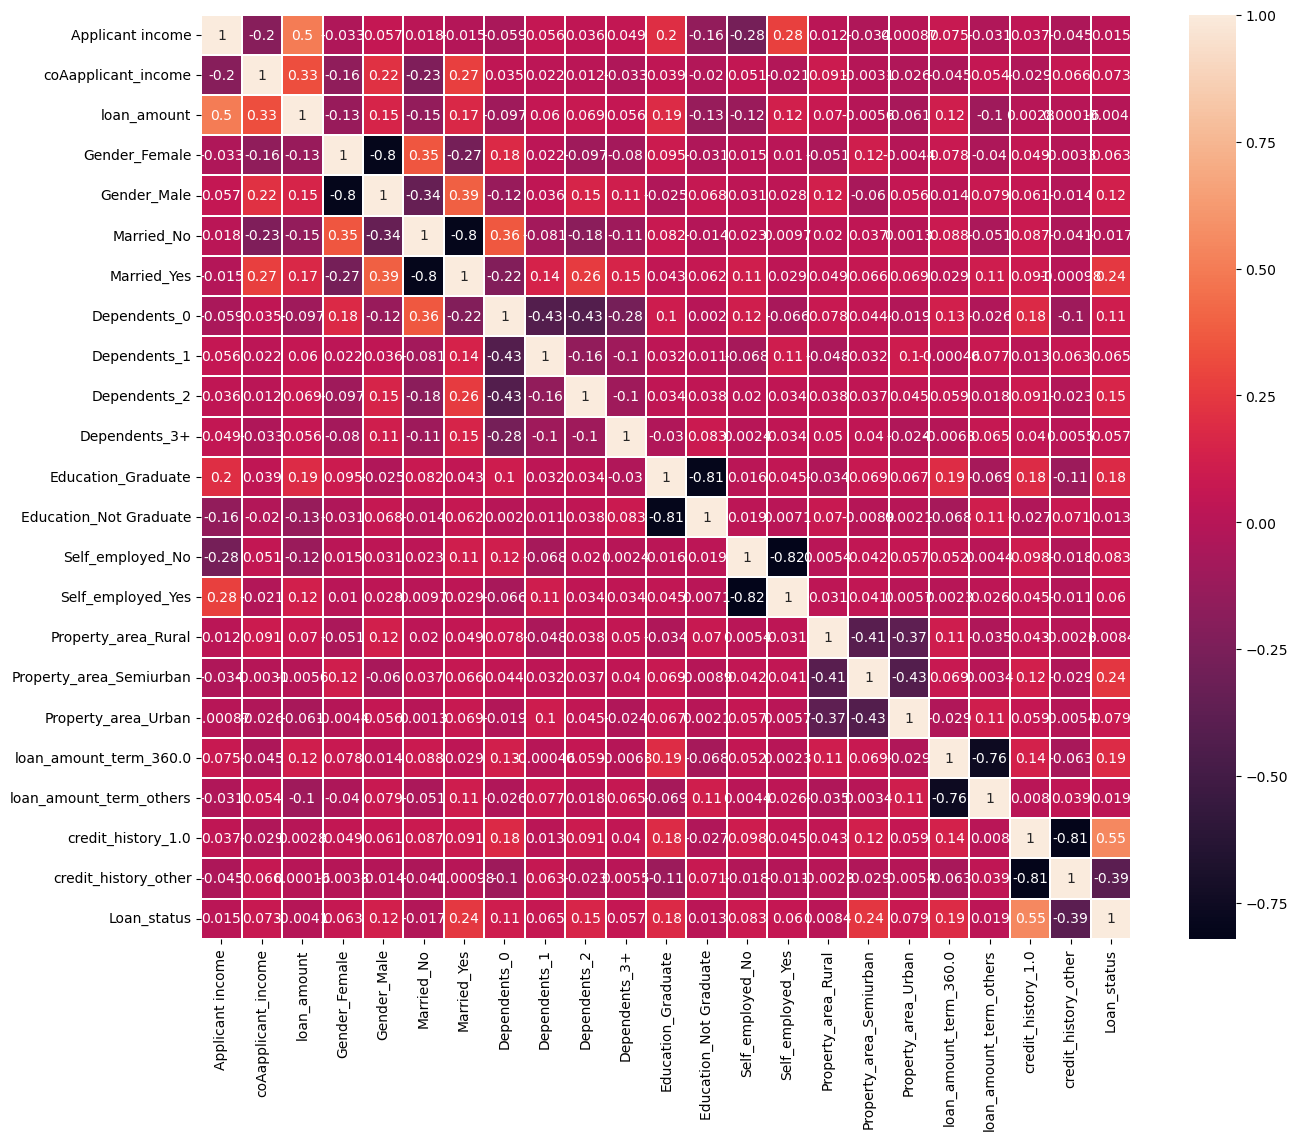

In [252]:
#SO this is an overfitted model so let us do somthing so that we can make this model better
plt.figure(figsize=(15,12))
sns.heatmap(pd.concat([x1,y1],axis=1).corr(),linewidths=0.1,annot=True)

There is not much relation between the columns the relation is onlt between the encoded columns which is fine

In [254]:
for i in range(22):
    print(x1.columns[i])
    print(variance_inflation_factor(x1,i))
    print('        ')

Applicant income
6.592826845937485
        
coAapplicant_income
2.6573935402058404
        
loan_amount
11.833875956274742
        
Gender_Female
3.7858792768764866
        
Gender_Male
14.36720917561577
        
Married_No
7.684477882185207
        
Married_Yes
13.006029455196071
        
Dependents_0
11.04798465078335
        
Dependents_1
3.611619733992524
        
Dependents_2
3.762032076386857
        
Dependents_3+
2.2535903614672703
        
Education_Graduate
14.883753384201647
        
Education_Not Graduate
4.686750315931011
        
Self_employed_No
20.14873366729908
        
Self_employed_Yes
3.797839666412348
        
Property_area_Rural
4.6029468249265255
        
Property_area_Semiurban
5.475243286151613
        
Property_area_Urban
4.8501245062032075
        
loan_amount_term_360.0
16.027453557688425
        
loan_amount_term_others
3.646111466523379
        
credit_history_1.0
14.00171663898919
        
credit_history_other
4.619183687823263
        


In [256]:
x1=x1.drop(columns='Applicant income')

In [258]:
for i in range(21):
    print(x1.columns[i])
    print(variance_inflation_factor(x1,i))
    print('        ')

coAapplicant_income
2.1561401176206125
        
loan_amount
7.3545321285136005
        
Gender_Female
3.7686473914735332
        
Gender_Male
14.17781804620314
        
Married_No
7.684311507589569
        
Married_Yes
12.997970631357367
        
Dependents_0
11.027043053965219
        
Dependents_1
3.607516067179583
        
Dependents_2
3.759331771224121
        
Dependents_3+
2.252186698858041
        
Education_Graduate
14.84636804772423
        
Education_Not Graduate
4.684634887759364
        
Self_employed_No
20.129114292658826
        
Self_employed_Yes
3.7484060803347226
        
Property_area_Rural
4.586874730559909
        
Property_area_Semiurban
5.443254471085612
        
Property_area_Urban
4.838599424188088
        
loan_amount_term_360.0
15.985138116759824
        
loan_amount_term_others
3.6204226272039133
        
credit_history_1.0
13.99971126905365
        
credit_history_other
4.618461932171978
        


In [259]:
#now things are find no this time we will only use the best features
corr=pd.concat([x1,y1],axis=1).corr()

In [263]:
corr['Loan_status'].sort_values(ascending=False)

Loan_status                1.000000
credit_history_1.0         0.548039
Married_Yes                0.241349
Property_area_Semiurban    0.235331
loan_amount_term_360.0     0.187118
Education_Graduate         0.176476
Dependents_2               0.154282
Gender_Male                0.121272
Dependents_0               0.106019
Self_employed_No           0.083368
Property_area_Urban        0.078652
coAapplicant_income        0.073164
Dependents_1               0.065244
Gender_Female              0.062842
Self_employed_Yes          0.060283
Dependents_3+              0.056835
loan_amount_term_others    0.019092
Education_Not Graduate     0.012746
Property_area_Rural        0.008369
loan_amount               -0.004102
Married_No                -0.017434
credit_history_other      -0.390798
Name: Loan_status, dtype: float64

In [265]:
#this time we will drop the non significant columns
x1=x1.drop(columns=['loan_amount_term_others','Education_Not Graduate','Property_area_Rural','loan_amount'])

In [267]:
model=GradientBoostingClassifier(learning_rate=0.1,max_depth=7,min_samples_leaf=1,min_samples_split=5,
                                n_estimators=100,subsample=0.9)

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=maxrs)

In [271]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.7920353982300885

In [272]:
accuracy_score(y_train,model.predict(x_train))

0.9505703422053232

In [273]:
#Still the overfitting is there it has removed a little bit but still it is there

I will make a fresh model with reshamples label and i will do the encoding afte the reshampling them

In [489]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')

In [490]:
data.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [491]:
data.columns=['Loan_id', 'Gender', 'Married', 'Dependents', 'Education', 'Self_employed', 'Applicant income', 'coAapplicant_income','loan_amount', 'loan_amount_term', 'credit_history', 'Property_area', 'Loan_status']

In [492]:
continuous_columns=[]
categorical_columns=[]
for i in data:
    if data[i].dtype=='object':
        categorical_columns.append(i)
    else:
        continuous_columns.append(i)
print(continuous_columns)
print(categorical_columns)

['Applicant income', 'coAapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history']
['Loan_id', 'Gender', 'Married', 'Dependents', 'Education', 'Self_employed', 'Property_area', 'Loan_status']


In [493]:
from sklearn.impute import SimpleImputer, KNNImputer
si=SimpleImputer(strategy='most_frequent') #For categorical columns we will use the mode which means most occouring element
knn=KNNImputer(n_neighbors=8) #For the continous we will use the knn with neighbours=8 which means mean of 8 will be used

In [494]:
data[categorical_columns]=si.fit_transform(data[categorical_columns])

In [495]:
data[continuous_columns]=knn.fit_transform(data[continuous_columns])

In [496]:
data.isna().sum()

Loan_id                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_employed          0
Applicant income       0
coAapplicant_income    0
loan_amount            0
loan_amount_term       0
credit_history         0
Property_area          0
Loan_status            0
dtype: int64

In [497]:
data=data.drop(columns='Loan_id')

In [498]:
def loan_amount(value):
    if value==360.0:
        return value
    else:
        return 'others'

In [499]:
data['loan_amount_term']=data['loan_amount_term'].apply(loan_amount)

In [500]:
data['loan_amount_term'].value_counts()

loan_amount_term
360.0     515
others     98
Name: count, dtype: int64

In [501]:
def credit(value):
    if value==1.000:
        return value
    else:
        return 'other'
data['credit_history']=data['credit_history'].apply(credit)

In [502]:
data['credit_history'].value_counts()

credit_history
1.0      488
other    125
Name: count, dtype: int64

In [ ]:
#So as all the process has already been explained and the reasons of these process also had been explain previously

In [503]:
data.head()

,Gender,Married,Dependents,Education,Self_employed,Applicant income,coAapplicant_income,loan_amount,loan_amount_term,credit_history,Property_area,Loan_status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
#we will encode using the labelencoder and than use the smote and than we will encode with the pd.get dummies

In [504]:
categorical_columns.append('loan_amount_term')

In [505]:
categorical_columns.append('credit_history')

In [506]:
categorical_columns

['Loan_id',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_employed',
 'Property_area',
 'Loan_status',
 'loan_amount_term',
 'credit_history']

In [507]:
data['loan_amount_term'].value_counts()

loan_amount_term
360.0     515
others     98
Name: count, dtype: int64

In [508]:
data['credit_history'].value_counts()

credit_history
1.0      488
other    125
Name: count, dtype: int64

In [509]:
len(categorical_columns)

10

In [511]:
categorical_columns.remove('Loan_id')

In [512]:
len(categorical_columns)

9

In [513]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_employed',
 'Property_area',
 'Loan_status',
 'loan_amount_term',
 'credit_history']

In [475]:
categorical_columns.remove('Loan_status')

In [514]:
len(categorical_columns)

9

In [515]:
data.head()

,Gender,Married,Dependents,Education,Self_employed,Applicant income,coAapplicant_income,loan_amount,loan_amount_term,credit_history,Property_area,Loan_status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y


In [516]:
data['loan_amount_term'].value_counts()

loan_amount_term
360.0     515
others     98
Name: count, dtype: int64

In [ ]:
data['loan_amount_term']=data['loan_amount_term'].replace({360.0:1,'others':0})

In [518]:
data

,Gender,Married,Dependents,Education,Self_employed,Applicant income,coAapplicant_income,loan_amount,loan_amount_term,credit_history,Property_area,Loan_status
0,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417.0,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
609,1,1,3,0,0,4106.0,0.0,40.0,others,1.0,0,1
610,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
611,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [519]:
data['loan_amount_term']=data['loan_amount_term'].replace({360.0:1,'others':0})

In [520]:
data['loan_amount_term'].value_counts()

loan_amount_term
1    515
0     98
Name: count, dtype: int64

In [521]:
data['credit_history'].value_counts()

credit_history
1.0      488
other    125
Name: count, dtype: int64

In [522]:
data['credit_history']=data['credit_history'].replace({1.0:1,'other':0})

In [523]:
data['credit_history'].value_counts()

credit_history
1    488
0    125
Name: count, dtype: int64

In [524]:
data

,Gender,Married,Dependents,Education,Self_employed,Applicant income,coAapplicant_income,loan_amount,loan_amount_term,credit_history,Property_area,Loan_status
0,1,1,1,0,0,4583.0,1508.0,128.0,1,1,0,0
1,1,1,0,0,1,3000.0,0.0,66.0,1,1,2,1
2,1,1,0,1,0,2583.0,2358.0,120.0,1,1,2,1
3,1,0,0,0,0,6000.0,0.0,141.0,1,1,2,1
4,1,1,2,0,1,5417.0,4196.0,267.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,0,0,0,0,2900.0,0.0,71.0,1,1,0,1
609,1,1,3,0,0,4106.0,0.0,40.0,0,1,0,1
610,1,1,1,0,0,8072.0,240.0,253.0,1,1,2,1
611,1,1,2,0,0,7583.0,0.0,187.0,1,1,2,1


In [525]:
data.head()

,Gender,Married,Dependents,Education,Self_employed,Applicant income,coAapplicant_income,loan_amount,loan_amount_term,credit_history,Property_area,Loan_status
0,1,1,1,0,0,4583.0,1508.0,128.0,1,1,0,0
1,1,1,0,0,1,3000.0,0.0,66.0,1,1,2,1
2,1,1,0,1,0,2583.0,2358.0,120.0,1,1,2,1
3,1,0,0,0,0,6000.0,0.0,141.0,1,1,2,1
4,1,1,2,0,1,5417.0,4196.0,267.0,1,1,2,1


In [526]:
data.dtypes

Gender                   int32
Married                  int32
Dependents               int32
Education                int32
Self_employed            int32
Applicant income       float64
coAapplicant_income    float64
loan_amount            float64
loan_amount_term         int64
credit_history           int64
Property_area            int32
Loan_status              int32
dtype: object

In [527]:
data['Dependents'].value_counts()

Dependents
0    359
1    102
2    101
3     51
Name: count, dtype: int64

In [528]:
#so now the values are label encoded so now let us use the smote

In [529]:
x=data.drop(columns='Loan_status')
y=data['Loan_status']

In [530]:
y=lab_enc.fit_transform(y)

In [531]:
y=pd.Series(y)

In [532]:
y.value_counts()

1    421
0    192
Name: count, dtype: int64

In [533]:
x1,y1=sm.fit_resample(x,y)

In [534]:
one.fit_transform(x[['Education']])

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [535]:
for i in categorical_columns:
    print(i)

Gender
Married
Dependents
Education
Self_employed
Property_area
Loan_status
loan_amount_term
credit_history


In [539]:
categorical_columns.remove('Loan_status')

In [ ]:
for i in categorical_columns:
    dummies=one.fit_transform(x1[[i]])
    dummies=pd.DataFrame(dummies)
    x1=pd.concat([x1,dummies],axis=1)
    x1=x1.drop(columns=i)
x1

In [543]:
loan=one.fit_transform(data[['loan_amount_term']])
loan=pd.DataFrame(loan)
x1=pd.concat([x1,dummies],axis=1)
x1=x1.drop(columns='loan_amount_term')
x1

,Applicant income,coAapplicant_income,loan_amount,credit_history,0,1,0,1,0,1,2,3,0,1,0,1,0,1,2,0,1,2
0,4583.000000,1508.000000,128.000000,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3000.000000,0.000000,66.000000,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2583.000000,2358.000000,120.000000,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,6000.000000,0.000000,141.000000,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5417.000000,4196.000000,267.000000,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,2195.330238,0.000000,65.118801,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
774,3557.167546,0.000000,96.560212,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
775,3126.851609,1276.669946,121.777012,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
776,4428.379244,2350.947998,123.709048,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [544]:
loan=one.fit_transform(data[['credit_history']])
loan=pd.DataFrame(loan)
x1=pd.concat([x1,dummies],axis=1)
x1=x1.drop(columns='credit_history')
x1

,Applicant income,coAapplicant_income,loan_amount,0,1,0,1,0,1,2,3,0,1,0,1,0,1,2,0,1,2,0,1,2
0,4583.000000,1508.000000,128.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3000.000000,0.000000,66.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2583.000000,2358.000000,120.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,6000.000000,0.000000,141.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5417.000000,4196.000000,267.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,2195.330238,0.000000,65.118801,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
774,3557.167546,0.000000,96.560212,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
775,3126.851609,1276.669946,121.777012,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
776,4428.379244,2350.947998,123.709048,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


All the preprocessing steps are done now let us proceed to the model building phase

In [551]:
x1.columns

Index([   'Applicant income', 'coAapplicant_income',         'loan_amount',
                           0,                     1,                     0,
                           1,                     0,                     1,
                           2,                     3,                     0,
                           1,                     0,                     1,
                           0,                     1,                     2,
                           0,                     1,                     2,
                           0,                     1,                     2],
      dtype='object')

In [553]:
x1.columns

Index(['Applicant income', 'coAapplicant_income', 'loan_amount', '0', '1', '0',
       '1', '0', '1', '2', '3', '0', '1', '0', '1', '0', '1', '2', '0', '1',
       '2', '0', '1', '2'],
      dtype='object')

In [554]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.6538461538461539 123


In [556]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=maxrs)

In [557]:
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,' ',accuracy_score(y_test,pred))

RandomForestClassifier()   0.6153846153846154
ExtraTreesClassifier()   0.6153846153846154
LogisticRegression()   0.5794871794871795
SVC()   0.5435897435897435
DecisionTreeClassifier()   0.5846153846153846
GradientBoostingClassifier()   0.676923076923077
AdaBoostClassifier()   0.5948717948717949
BaggingClassifier()   0.5948717948717949


The models are performing poorly for this dataset 
Now let us come to the conlusiond ans we will not move further now in this project

Conclusions and the findings associated with this project on this dataset-

1. We made several model for this project and there were various model which performed well on various conditions
2.At first we made the models witht the standardized feature columns and in this condition the logistic regression was the best model with an accuracy of 0.85
3.After that we made the model without standardizing thr feature columns as we know that the trees based models can work without Standardizing the columns also. And in this condition also logistic regression was the best model with an accuracy of 0.85. IN this condition the random forest was also performing better with an accuracy of 0.86. And the accuracy of the tree based models like decesion trees, randomforest, gradient boost, extra tree increased by a considerable margin using the non standatdized feature columns.

4. After that we used the reshampled labels. we have done this because the label was having more yes than no that is why we used smote for this. And the rest things were the same. In this condition the randomforest performed the best with and accuracy of 0.86 and gradient boost with an accuracy of 0.80. The randomforest model was very good with no overfitting.

5. We also made another model with reshampled dataset in which we first labele encoded the colunmns and we used smote and than we encoded using one hot. But no model performed good in this case. That is why we have not done any tuning for these models.

The best model was the random forest with an accuracy of 0.85 with default label and featres and with standardized columns

In [623]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.8571428571428571

In [624]:
accuracy_score(y_train,model.predict(x_train))

0.7709750566893424

In [ ]:
#The model is not overfitted 

In [625]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.56      0.70        43
           1       0.84      0.98      0.91       104

    accuracy                           0.86       147
   macro avg       0.88      0.77      0.80       147
weighted avg       0.87      0.86      0.84       147



In [626]:
print(confusion_matrix(y_test,pred))

[[ 24  19]
 [  2 102]]


In [627]:
#Saving the model
import joblib
joblib.dump(model,'logisticregression_loan_prediction.PKL')

['logisticregression_loan_prediction.PKL']

Another good model was randomforest with reshampled data. It also had no overfitting

In [691]:
model=RandomForestClassifier(bootstrap=True,max_depth=30,max_features='sqrt',min_samples_leaf=4,
                            min_samples_split=2,n_estimators=300) #These params we got from the tuning we had done earlier

In [692]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.8723404255319149

In [683]:
accuracy_score(y_train,model.predict(x_train))

0.8581560283687943

In [666]:
#So this model also has no overfitting at all
#Saving the model
joblib.dump(model,'randomforest_loan_predition.PKL')

['randomforest_loan_predition.PKL']

So after all these models the randomforest in which we used the reshamped feature columns and no standardizatio of the feature columns was the best peforming model with best accuracy

In [693]:
#Let us see other metrics of this model
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        80
           1       0.88      0.91      0.89       108

    accuracy                           0.87       188
   macro avg       0.87      0.87      0.87       188
weighted avg       0.87      0.87      0.87       188



In [694]:
print(confusion_matrix(y_test,pred))

[[66 14]
 [10 98]]


Thanks sir.